In [ ]:
!pip install pyCaret[full]

     |████████████████████████████████| 305 kB 5.1 MB/s 
     |████████████████████████████████| 308 kB 12.3 MB/s 
     |████████████████████████████████| 59 kB 2.5 MB/s 
     |████████████████████████████████| 11.8 MB 12.1 MB/s 
     |████████████████████████████████| 173.6 MB 7.2 kB/s 
     |████████████████████████████████| 659 kB 49.1 MB/s 
     |████████████████████████████████| 54 kB 1.8 MB/s 
     |████████████████████████████████| 73 kB 1.9 MB/s 
     |████████████████████████████████| 52.7 MB 135 kB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 132 kB 57.7 MB/s 
     |████████████████████████████████| 564 kB 51.0 MB/s 
     |████████████████████████████████| 76.1 MB 1.2 MB/s 
     |████████████████████████████████| 177 kB 52.3 MB/s 
     |████████████████████████████████| 346 kB 36.8 MB/s 
     |████████████████████████████████| 40 kB 4.4 MB/s 
     |████████████████████████████████| 100 kB 6.9 MB/s 
     |██████████████████

In [ ]:
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [ ]:
from pycaret.classification import *
import plotly.express as px
fig = px.scatter(x=data['Carat Weight'], y=data['Price'], 
                 facet_col = data['Cut'], opacity = 0.25, template = 'plotly_dark', trendline='ols',
                 trendline_color_override = 'red', title = 'SARAH GETS A DIAMOND - A CASE STUDY')
fig.show()

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
fig = px.histogram(data, x=["Price"], template = 'plotly_dark', title = 'Histogram of Price')
fig.show()

In [ ]:
import numpy as np
# create a copy of data
data_copy = data.copy()
# create a new feature Log_Price
data_copy['Log_Price'] = np.log(data['Price'])
# plot histogram
fig = px.histogram(data_copy, x=["Log_Price"], title = 'Histgram of Log Price', template = 'plotly_dark')
fig.show()

In [ ]:
from pycaret.regression import *
s = setup(data, target = 'Price', transform_target = True, log_experiment = True, experiment_name = 'diamond') 

,Description,Value
0,session_id,322
1,Target,Price
2,Original Data,"(6000, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4199, 28)"


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,578.6914,1.298582e+06,1129.5335,0.9875,0.0607,0.0450,1.531
lightgbm,Light Gradient Boosting Machine,638.5985,1.711712e+06,1296.0450,0.9835,0.0661,0.0490,0.149
xgboost,Extreme Gradient Boosting,649.5434,1.740397e+06,1302.4000,0.9833,0.0681,0.0504,4.778
rf,Random Forest Regressor,747.4489,2.399791e+06,1527.8830,0.9771,0.0790,0.0580,1.290
et,Extra Trees Regressor,758.8411,2.394962e+06,1539.3370,0.9769,0.0803,0.0593,1.204
gbr,Gradient Boosting Regressor,758.7667,2.481301e+06,1550.7519,0.9761,0.0769,0.0575,0.295
dt,Decision Tree Regressor,963.9629,3.941169e+06,1959.2785,0.9621,0.1029,0.0753,0.040
ada,AdaBoost Regressor,2057.7697,1.750609e+07,4153.7180,0.8335,0.1886,0.1541,0.266
knn,K Neighbors Regressor,3060.5026,3.681456e+07,6044.8956,0.6473,0.3671,0.2347,0.087
omp,Orthogonal Matching Pursuit,3326.2919,8.452710e+07,8913.7361,0.1603,0.2830,0.2226,0.026


In [ ]:
# check the residuals of trained model
plot_model(best, plot = 'residuals_interactive')

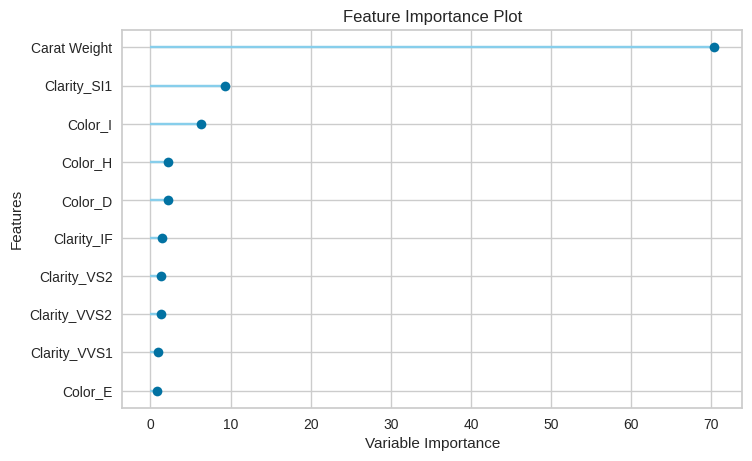

In [ ]:
# check feature importance
plot_model(best, plot = 'feature')

In [ ]:
# finalize the model
final_best = finalize_model(best)
# save model to disk
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  PowerTransformedTargetRegressor(border_count=254,
                                                  loss_function

In [ ]:
save_model(final_best,'deploy')
!mlflow ui

Transformation Pipeline and Model Successfully Saved
[2022-03-13 14:45:40 +0000] [992] [INFO] Starting gunicorn 20.1.0
[2022-03-13 14:45:40 +0000] [992] [INFO] Listening at: http://127.0.0.1:5000 (992)
[2022-03-13 14:45:40 +0000] [992] [INFO] Using worker: sync
[2022-03-13 14:45:40 +0000] [995] [INFO] Booting worker with pid: 995
[2022-03-13 14:46:09 +0000] [992] [INFO] Handling signal: int

Aborted!
[2022-03-13 14:46:09 +0000] [995] [INFO] Worker exiting (pid: 995)
[2022-03-13 14:46:10 +0000] [992] [INFO] Shutting down: Master


In [ ]:
from pycaret.regression import load_model
pipeline = load_model('/content/deploy')
# print pipeline
print(pipeline)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 PowerTransformedTargetRegressor(border_count=254,
                         

In [ ]:
# create a copy of data and drop Price
data2 = data.copy()
data2.drop('Price', axis=1, inplace=True)
# generate predictions
from pycaret.regression import predict_model
predictions = predict_model(pipeline, data=data2)
predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Label
0,1.10,Ideal,H,SI1,VG,EX,GIA,5353.820563
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3528.905458
2,0.85,Ideal,H,SI1,EX,EX,GIA,3377.520767
3,0.91,Ideal,E,SI1,VG,VG,GIA,4473.187039
4,0.83,Ideal,G,SI1,EX,EX,GIA,3323.394680
